In [10]:
from typing import TypedDict, List
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START , END
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()

model=ChatGoogleGenerativeAI(
    model='gemini-2.5-flash'
)

In [11]:


class AgentState(TypedDict):
    message: List[HumanMessage]

def process_message(state: AgentState) -> AgentState:
    model_response = model.invoke(state['message'])
    state['message'].append(model_response)
    print(f"Agent response: {model_response}")
    print('\n\n')
    return state

def end(state: AgentState) -> AgentState:
    return state



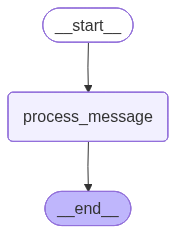

In [12]:
graph = StateGraph(AgentState)

graph.add_node('process_message', process_message)

graph.add_edge(START, 'process_message')
graph.add_edge('process_message', END)

bot = graph.compile()

bot



In [13]:
agent_input = {
    'message': [HumanMessage(content='Hello, how are you?')]
}

response = bot.invoke(agent_input)

print(response)

Agent response: content="Hello! I'm doing well, thank you for asking. As an AI, I don't experience feelings in the same way humans do, but I'm operating perfectly and ready to assist you.\n\nHow are you doing today?" additional_kwargs={} response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'} id='lc_run--019b2835-9592-70f3-8609-4621598b1549-0' usage_metadata={'input_tokens': 7, 'output_tokens': 239, 'total_tokens': 246, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 190}}



{'message': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! I'm doing well, thank you for asking. As an AI, I don't experience feelings in the same way humans do, but I'm operating perfectly and ready to assist you.\n\nHow are you doing today?", additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-fla